# COMS21202: Symbols, Patterns and Signals #
**CW1**: *This marked assignment has 3 parts to be undertaken in weeks 17-19 with students working in pairs.*

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, mahalanobis
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.mlab import bivariate_normal
import itertools



%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## Objectives ##
The goal of this assignment is for you to gain experience with clustering and classifying data. You will be given two sets of data points, each containing values for 5 different attributes (features) derived from an unspecified number of different object classes. One set contains 150 points and you should use it to *train* your classifier. The second set contains 15 points and you should use it to *test* your classifier. A complication is that the training set is **not** labelled - you will need to analyse the feature values, identify two features which are able to separate the different object classes and then cluster the points to obtain class labels which can then be used to train a classifier.

The steps that you should follow are detailed below. You will need to become familiar with several new `Python` commands and so we advise that you make use of the `Python` help facility. You will each be given different data files, with different attribute values, different class parameters and different distinguishing features. Your results will therefore not be the same as that of other students. For those working in pairs you will have to carry out the work for both data sets and be able to explain the differences obtained.

## CW1a (week 17) ##
### 1. ###
Collect your training and test data from SAFE (if you have difficulties in obtaining the dataset, try to use [this one](https://www.ole.bris.ac.uk/bbcswebdav/courses/COMS21202_2017/cw1data.train.txt) first and immediately alert TAs or Lecturers). You then need to identify which two features separate the classes in your training data. The best way of doing this is to visualise the data by plotting the attribute values for each pair of features. Use the `np.loadtxt` command to read in the data and the plotting commands (try `plotmatrix`) to plot attribute values against each other. Visually inspect the results to understand the data and argue which features best separate the classes. Once you identified the two features create a new data matrix `X` holding only those features as columns.

In [2]:
def plotmatrix(Matrix):
  r, c = Matrix.shape
  fig = plt.figure()
  plotID = 1
  for i in range(c):
    for j in range(c):
      ax = fig.add_subplot( c, c, plotID )
      ax.scatter( Matrix[:,i], Matrix[:,j] )
      plotID += 1
  plt.show()

# load data
testdata = np.loadtxt("mi16481.test")
traindata = np.loadtxt("mi16481.train")

# MANUAL SETTING
feature1 = traindata[:, 2]
feature2 = traindata[:, 4]
X = np.matrix([feature1, feature2]).T

### Comments ###

It looks as if the first and second features look as if they can be clustered when compared to other features, hence we aim to use those 2 features in our k-means clustering, where k = 2.

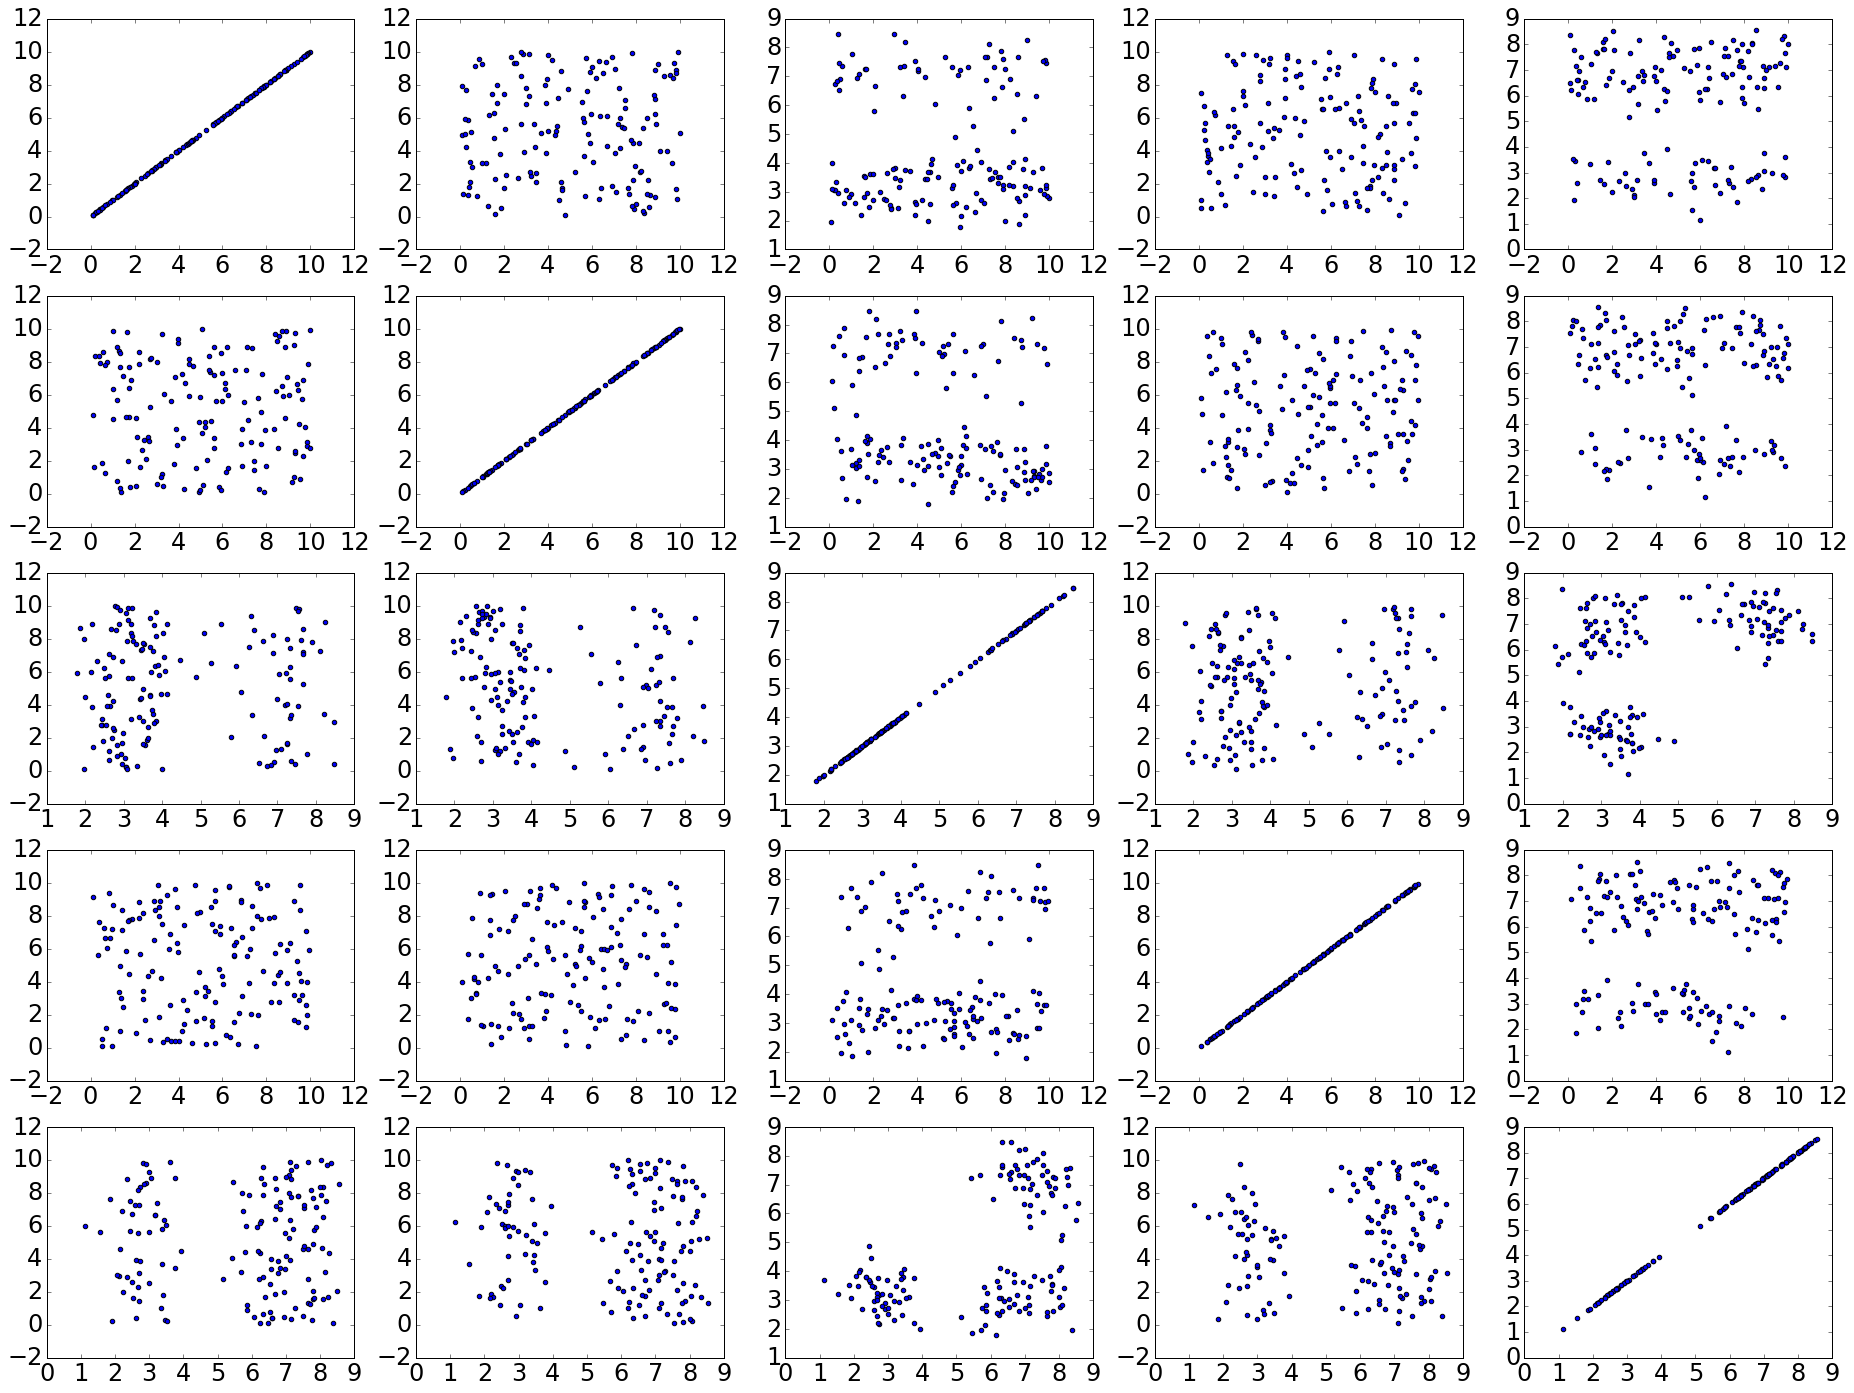

In [4]:
plotmatrix(traindata)

### 2. ###
You now need to derive class labels for each of the data points in the training data. You can do this automatically using the K-means algorithm applied to `X`, where *K* is the number of classes you identified in the previous step. Use the function `kmeans` to do this. Next, you want to visualise the outcome of the K-means clustering. One way to do this is to plot each cluster found by K-means in a different colour. To this end, use the vector of cluster indices returned by `kmeans` to store the points for each class in separate matrices by means of the `np.where` command.

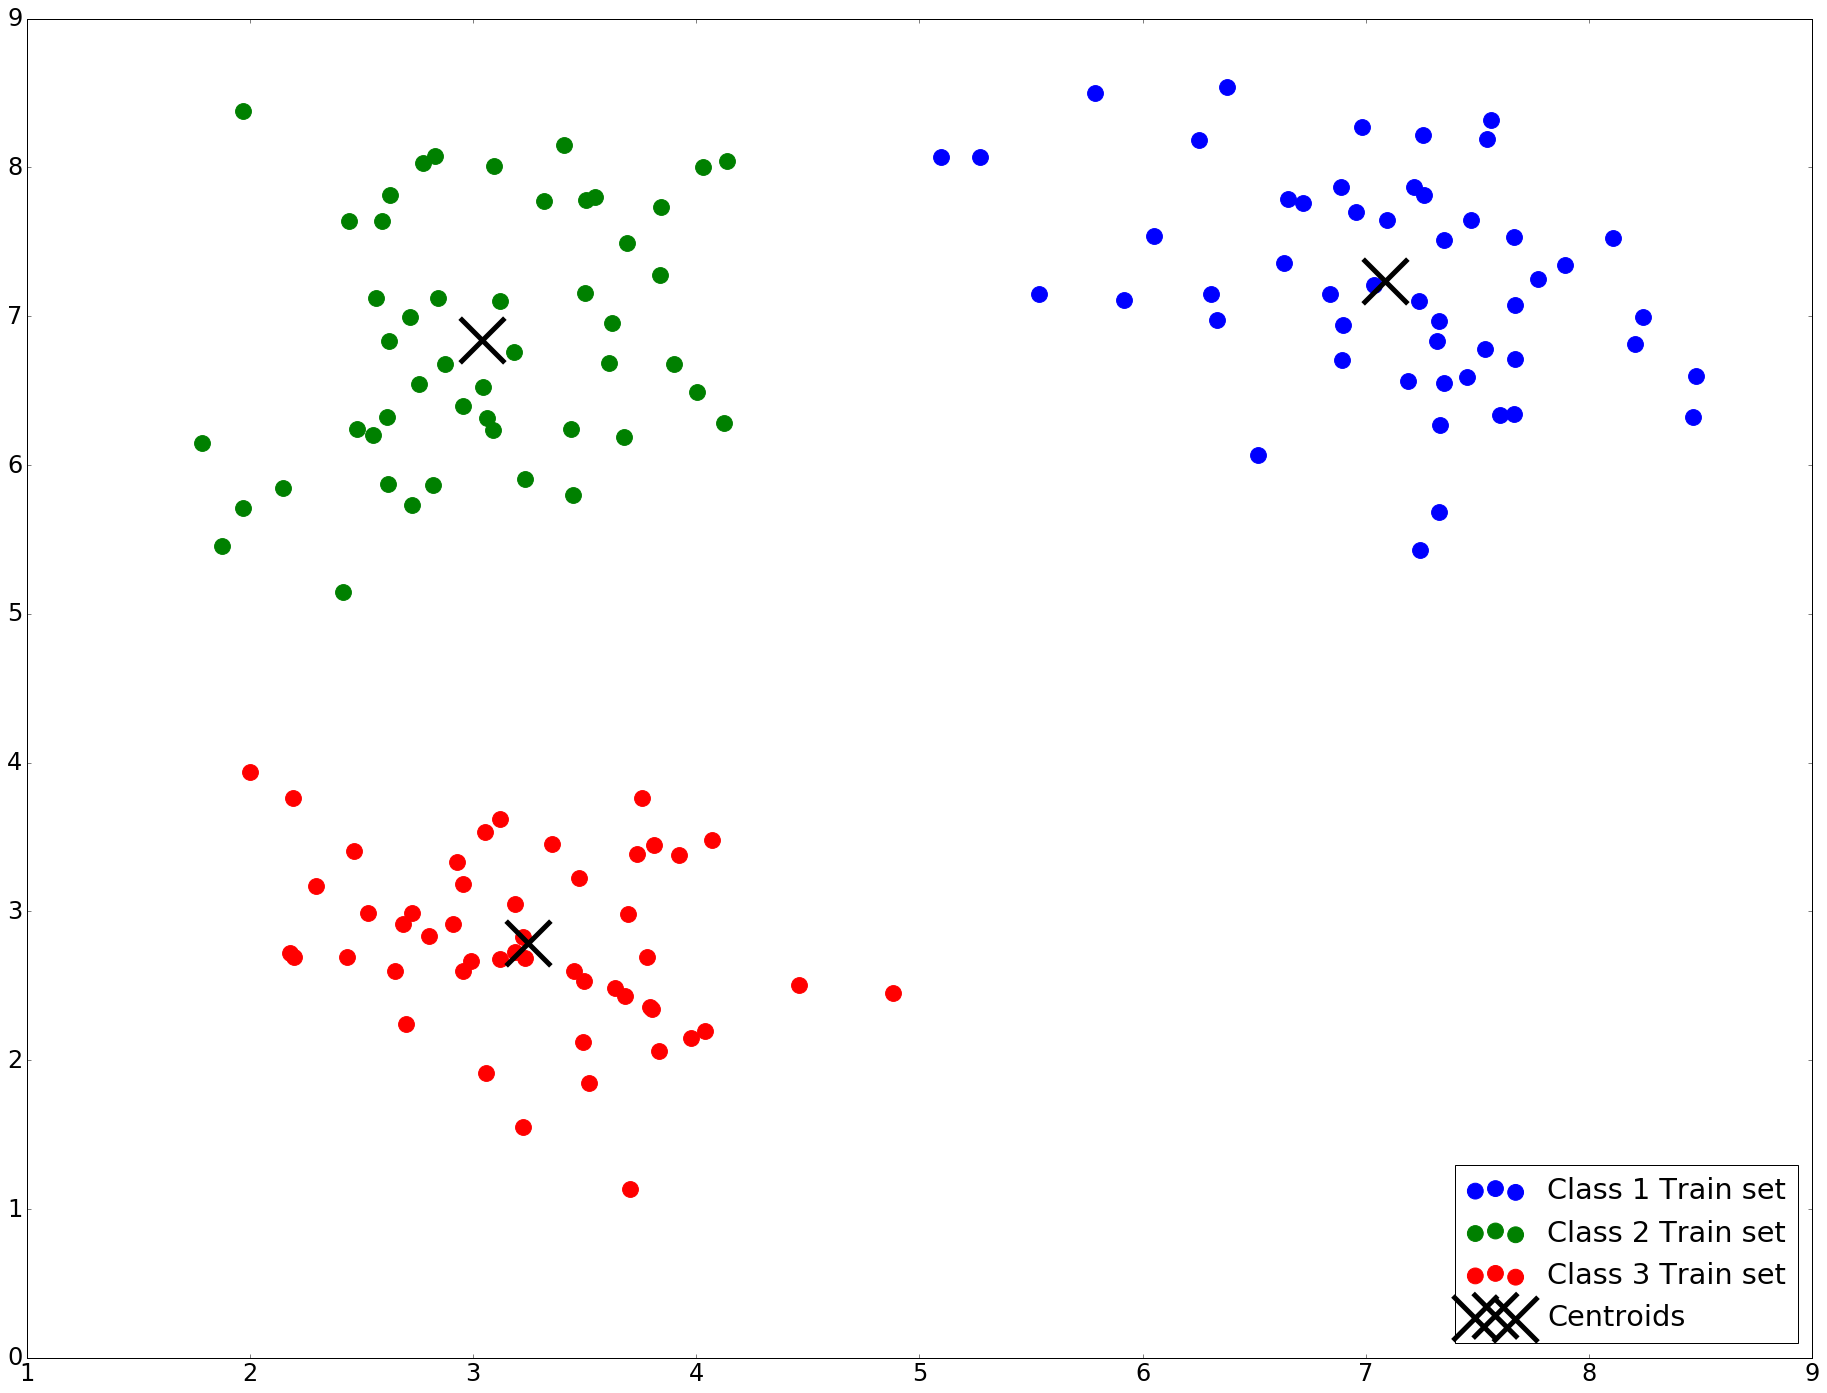

<class 'numpy.ndarray'>
[7.0871136  7.23373396]


In [8]:
def kmeans(Data, NClusters):
  km = KMeans(NClusters)
  fitted = km.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

# colors list in case we might want more clusters for another data set
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']



# plots the training data after applying the kmeans algorithm
def plotClusters(trainData, NClusters):
    # Data - The training dataset
    # Nclusters - Number of clusters to divide the data into, included for modularity
    
    centers, labels, inertia = kmeans(trainData, NClusters)
    
    labelledTrainData = []  #element i is all the samples in class i
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(0, NClusters):
        labelledTrainData.append(trainData[np.where(labels == i)])
        ax.scatter([trainData[np.where(labels == i)][:,0]], [trainData[np.where(labels == i)][:,1]], s=250, color=colors[i % len(colors)], label = "Class " + str(i+1) + " Train set")
    ax.scatter([centers[:,0]], [centers[:,1]], marker='x', s=2000, color='k', label = "Centroids", linewidths=5)
    ax.legend(loc=4)
    plt.show()
    
    return centers, labels, inertia, NClusters, labelledTrainData #for future use, increasing modularity

centers, labels, inertia, clusterAmt, labelledTrainData = plotClusters(X, 3)
print(type(centers[0]))

#clusterAmt to be used to further modularize part 3
print(centers[0])

### Your comments ###

Put here any comments

### 3. ###
The centroids found by K-means can now be used as a simple nearest-neighbour classifier. Load your test data and select the two relevant features. Using a combination of the `cdist(X, metric='euclidean', p=2)` and `np.argmin` (with `axis` parameter) commands, construct a vector of labels for each of the test points indicating which cluster centroid is the nearest. Plot the test points in the previous plot with the colour indicating their class but a different symbol. The corresponding decision boundaries can be plotted by passing the centroids to the `Voronoi` and `voronoi_plot_2d` functions (remember to set the `ax` parameter of the later one to your current plot).

[[2.9468968 2.5872137 2.       ]
 [7.8585434 7.5346403 0.       ]
 [3.5064059 5.6821996 1.       ]
 [2.4389749 3.7897885 2.       ]
 [7.1849691 6.4297045 0.       ]
 [5.9785957 8.1349618 0.       ]
 [2.432321  6.2527557 1.       ]
 [2.2201837 2.9068091 2.       ]
 [4.8401793 3.1860787 2.       ]
 [7.2817634 6.3514659 0.       ]
 [3.4416567 7.0763583 1.       ]
 [4.2049302 7.9651889 1.       ]
 [6.9161732 7.1992746 0.       ]
 [3.2126909 6.0236965 1.       ]
 [2.6765574 3.0308686 2.       ]]
[2 0 1 2 0 0 1 2 2 0 1 1 0 1 2]


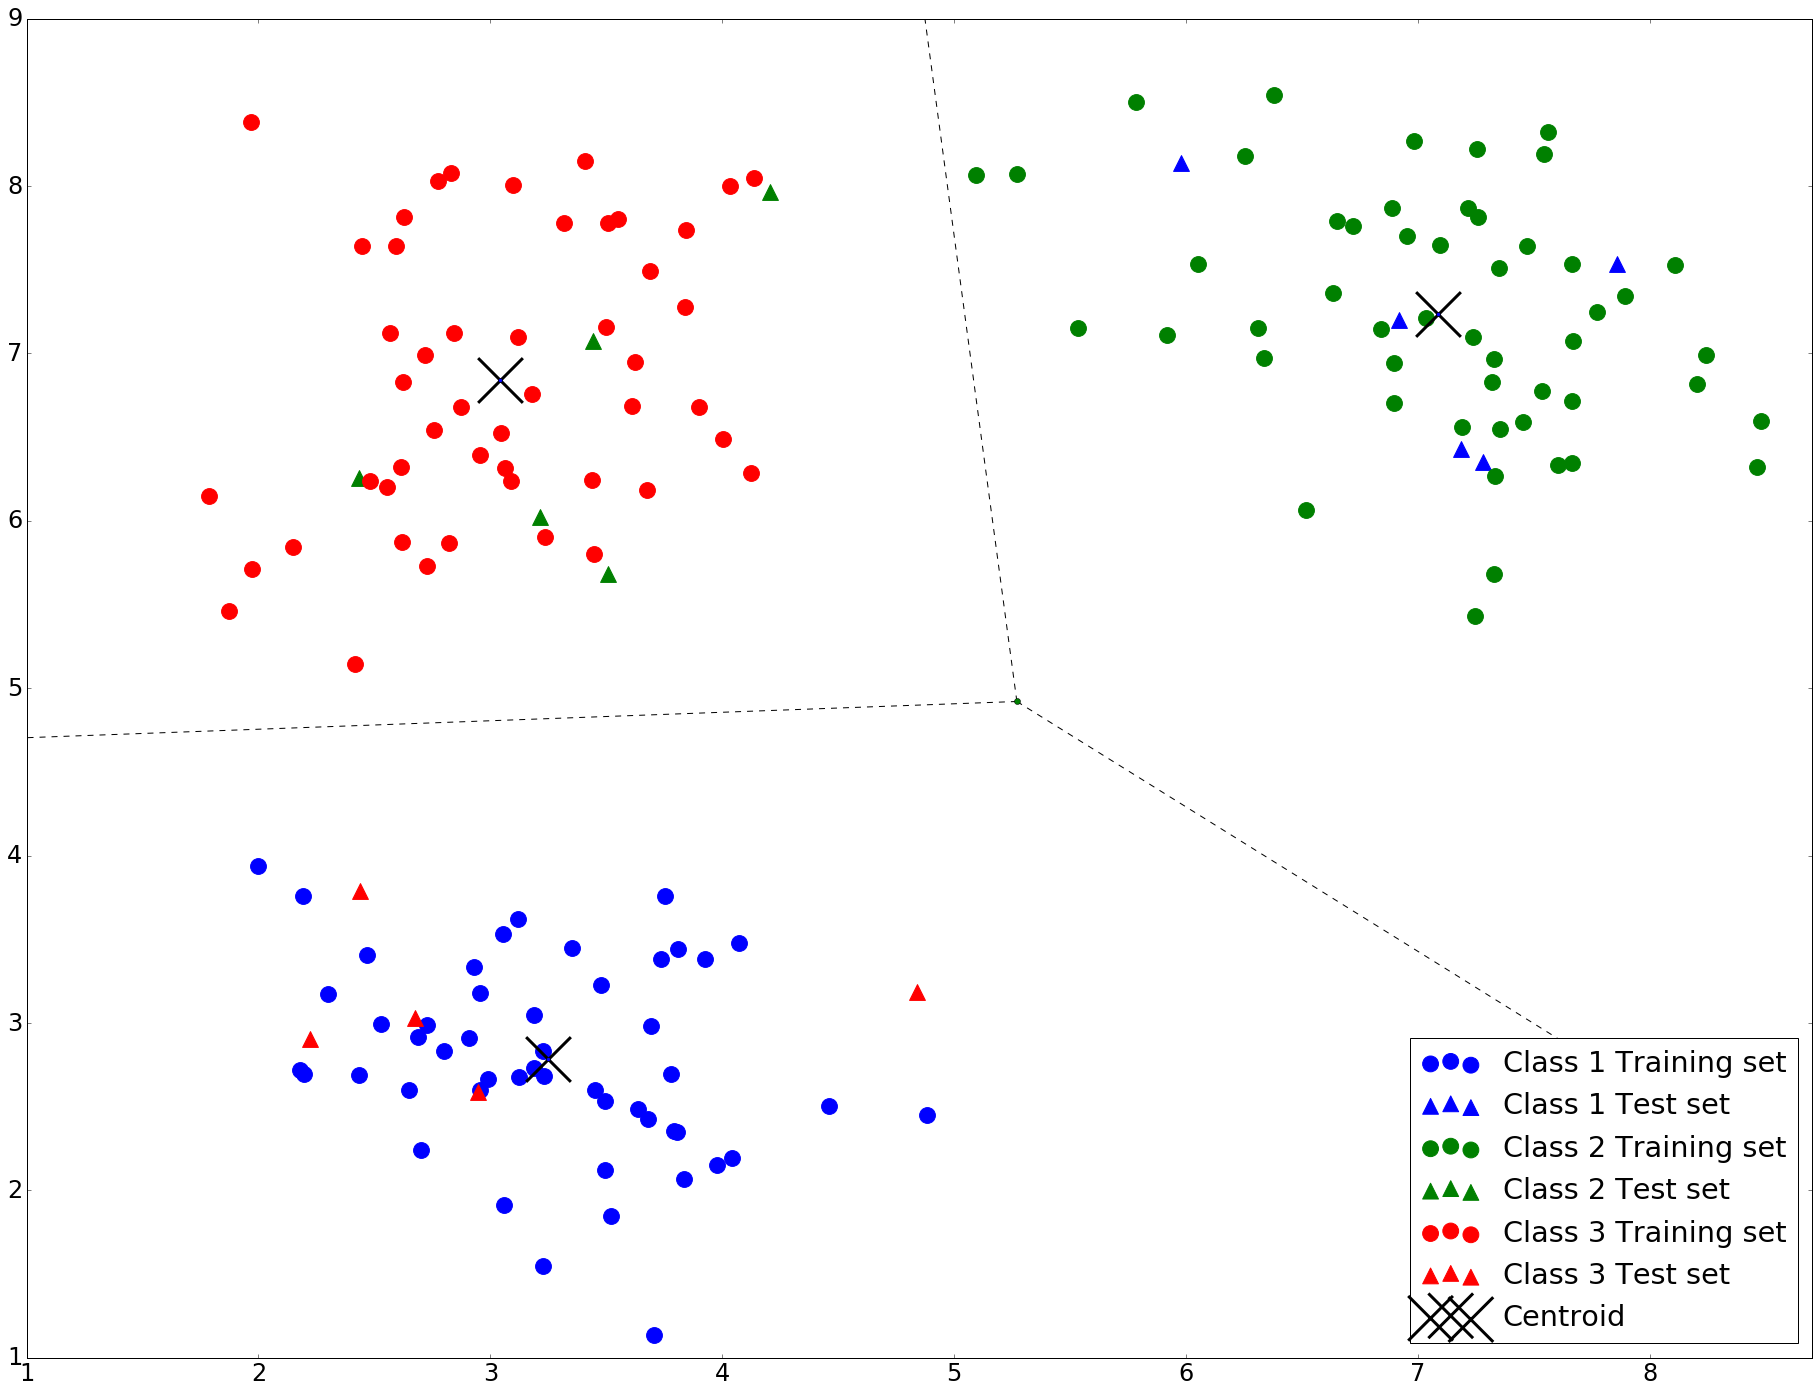

[[7.0871136  7.23373396]
 [3.04226093 6.84052845]
 [3.24768981 2.78533789]]


In [9]:
# extracting test data
feature1Test = testdata[:, 2]
feature2Test = testdata[:, 4]
Xtest = np.matrix([feature1Test, feature2Test]).T

testDataAmt = len(feature1Test)

# list of np.array, where the i'th component has np.array, jth element of np.array is the distance between the j'th element and the centroid i
distanceToCentroid = [np.array(cdist(Xtest, np.matrix(list(map(lambda x: list(centers[i]), np.zeros(testDataAmt)))), metric='euclidean', p=2)[:,0]) for i in range(0, 3)]

# matrix where row k is the distance to centroid column no. and the k'th feature
centroidMatrix = np.matrix([distanceToCentroid[i] for i in range(0, clusterAmt)])

# vector of labels for test data after applying nearest neighbor algorithm
labelsTest = np.array(list(map(np.argmin, centroidMatrix.T)))

# vector where row i is feature test vector i with its label on the rightmost column
vectorFeatureAndLabels = np.concatenate((Xtest, np.matrix(labelsTest).T), axis=1)

#printing to show labels don't change, but colours do for some reason
print(vectorFeatureAndLabels)
print(labelsTest)


# plot the data after applying K-nearest neighbors algorithm
# run k-means with 3 clusters first
def plotClustersWithTrainData(trainData, testLabels, testData):
    #trainData - training data
    #testLabels - labels for test data, calculated above
    #testData - testing data
    
    centers, labels, inertia = kmeans(trainData, clusterAmt) #clusterAmt from the function above
    labelledTrainData = []  #element i is all the training data samples in class i
    labelledTestData = []  #element i is all the test data samples in class i
    
    figN = plt.figure()
    axN = figN.add_subplot(111)
    for i in range(0, clusterAmt):
        labelledTrainData.append(trainData[np.where(labels == i)])
        labelledTestData.append(testData[np.where(labelsTest == i)])
        axN.scatter([trainData[np.where(labels == i)][:,0]], [trainData[np.where(labels == i)][:,1]], s=250, color=colors[i], label = "Class " + str(i+1) + " Training set") #samples from train data
        axN.scatter([testData[np.where(testLabels == i)][:,0]], [testData[np.where(testLabels == i)][:,1]], marker="^", s=250, color = colors[i], label = "Class " + str(i+1) + " Test set") #samples from test data
    axN.scatter(centers[:,0], centers[:,1], marker='x', s=2000, color='k', label="Centroid", linewidths=3)   #plotting the cluster centroids
    vor = Voronoi(np.array([centers[i] for i in range(0, clusterAmt)]))
    voronoi_plot_2d(vor, axN, line_width=5)
    
    #make plot aesthetic
    plt.gca().set_xlim([1,8.7])
    plt.gca().set_ylim([1,9])
    plt.legend(loc=4)
    plt.show()
    
    return centers, labels, inertia, clusterAmt, labelledTrainData, labelledTestData

AC, AL, AI, ACL, LTD2, LTD1 = plotClustersWithTrainData(X, labelsTest, Xtest)
print(np.array([centers[i] for i in range(3)]))

### Your comments ###

Put here any comments

### 4. ###
Finally, we want you to deliberately find a non-optimal clustering. To this end, use the within-cluster sums of point-to-centroid distances returned by K-means to keep calling K-means until you find a clearly non-optimal value. You may need to change the definition of `kmeans` function and play around with its initialisation parameters. Plot the Voronoi diagram in the same plot to demonstrate non-optimality.

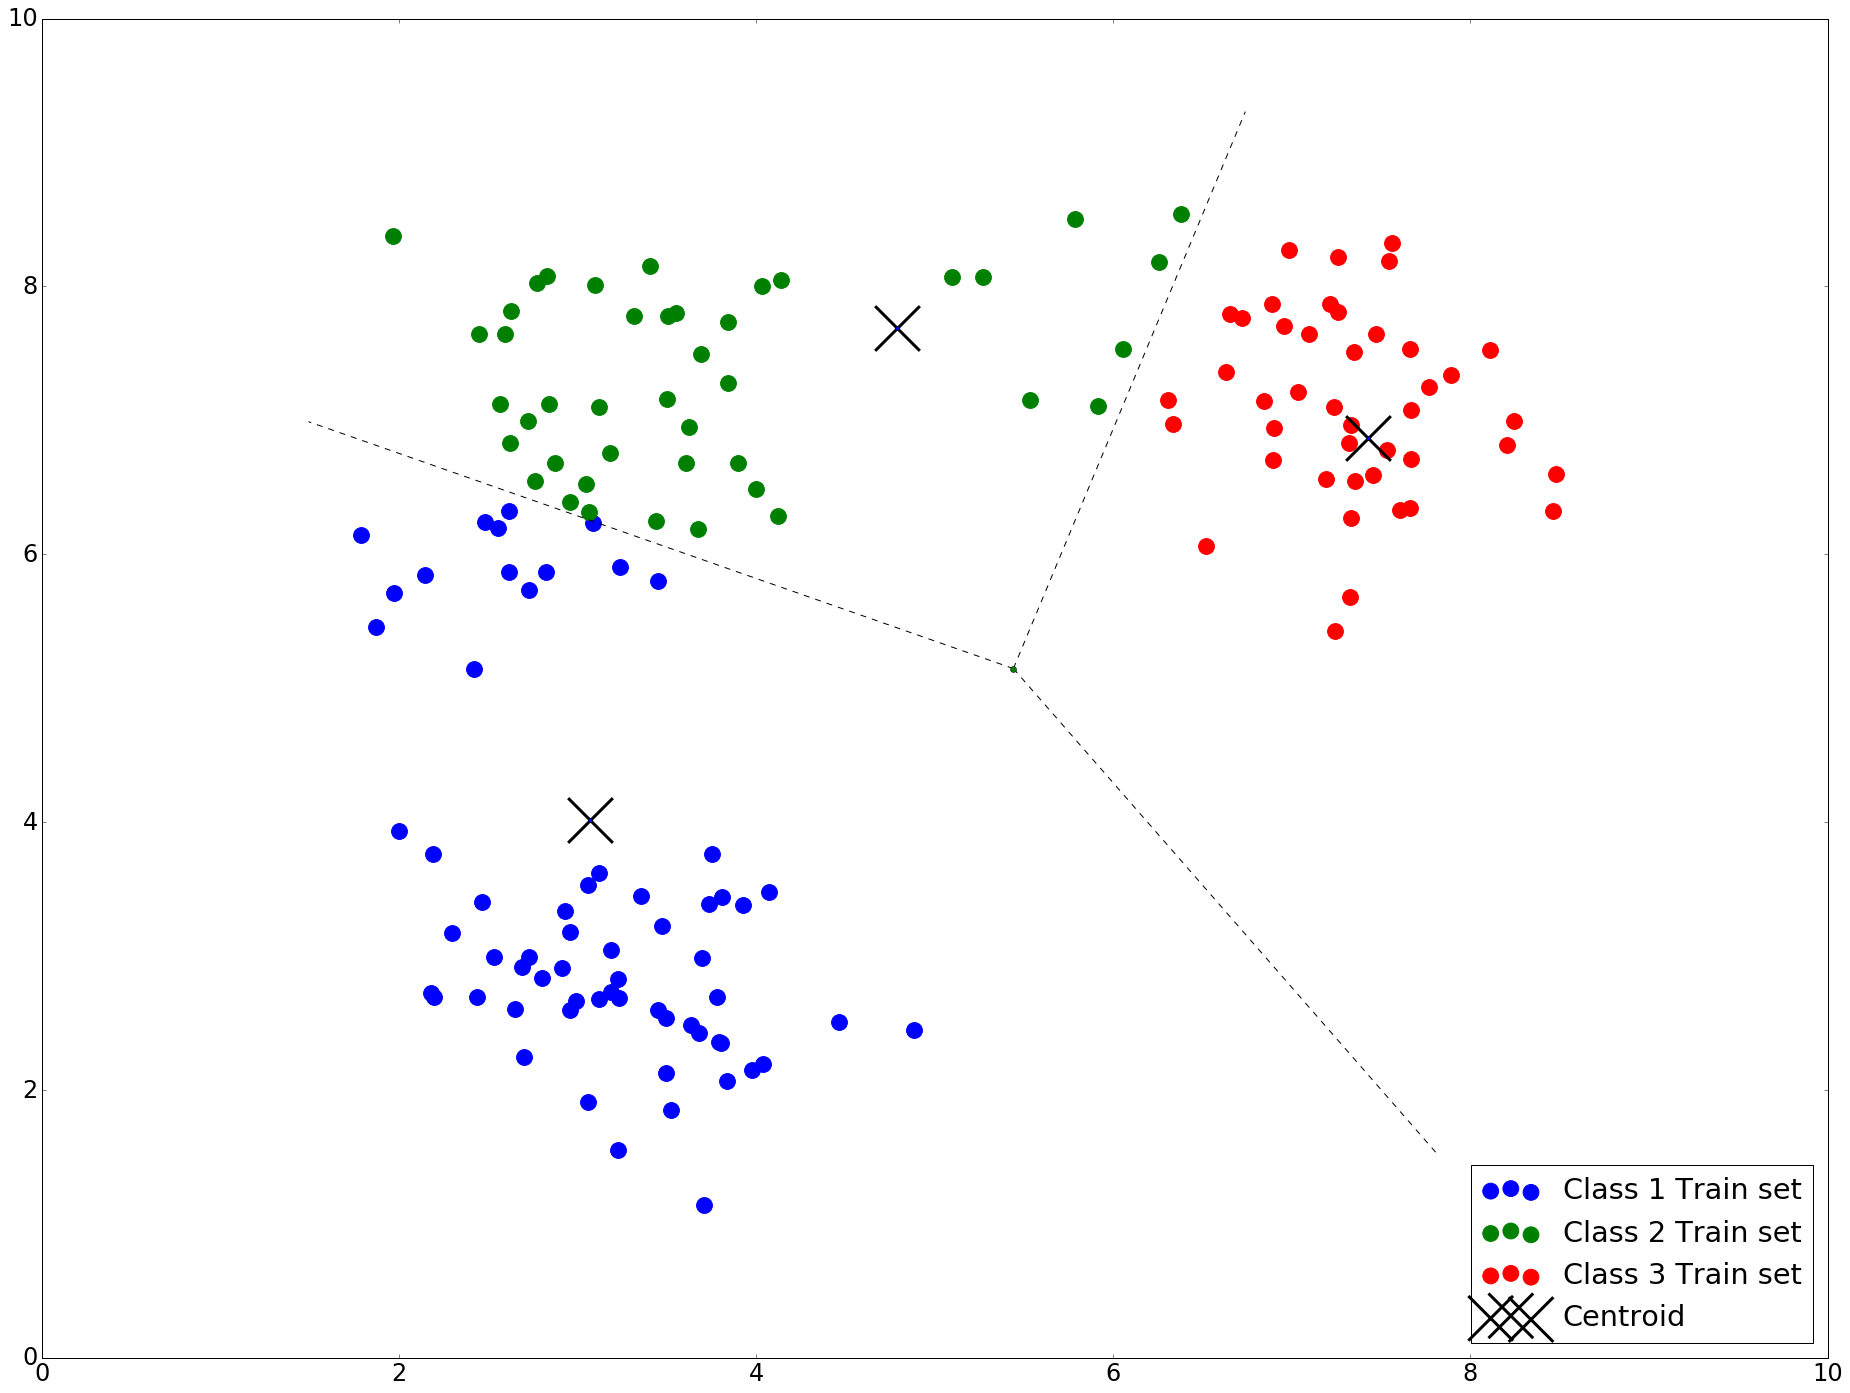

333.50031627719414

In [9]:
# version for non optimal clustering with more than 3 clusters
def kmeansFake1(data, nClusters):
  km = KMeans(nClusters)
  fitted = km.fit(data)
  km1 = KMeans(int(fitted.inertia_))
  fitted1 = km1.fit(data)
  return (fitted1.cluster_centers_, fitted1.labels_, fitted1.inertia_)

# version for non optimal clustering with arbitrary starting centroids
def kmeansFake2(data, nClusters):
    km = KMeans(nClusters, init=np.array([[-14,50],[-15,-10],[20,20]]), n_init=1, max_iter=5)
    fitted = km.fit(data)
    return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

# version of non optimal clustering which is required, takes values with highest inertia after n runs
def kmeansFake3(data, nClusters, iterations):
    maxinertia = 0
    for i in range(0, iterations):
        km = KMeans(nClusters, n_init=1, max_iter=1)
        fitted = km.fit(data)
        if (fitted.inertia_ > maxinertia):
            maxinertia = fitted.inertia_
            worst = fitted
    return(worst.cluster_centers_, worst.labels_, worst.inertia_)
        
# plots a non optimal clustering with n classes based on highest inertia after k iterations
def plotClustersNonOptimal(data, nClusters, iterations):
    # data - training data set
    # nClusters - number of clusters to divide data into
    # iterations - how many times to run non optimal kmeans, direct correlation with non optimality
    
    centersNonOptimal, labelsNonOptimal, inertiaNonOptimal = kmeansFake3(data, nClusters, iterations)
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    distinctLabels = len(list(set(labelsNonOptimal)))
    for i in range(0, distinctLabels):
        ax1.scatter([X[np.where(labelsNonOptimal == i)][:,0]], [X[np.where(labelsNonOptimal == i)][:,1]], s=250, color=colors[i], label="Class " + str(i+1) + " Train set")
    ax1.scatter([centersNonOptimal[:,0]], [centersNonOptimal[:,1]], marker='x', s=2000, color='k', label="Centroid", linewidths=3)
    vor = Voronoi(np.array(centersNonOptimal))
    voronoi_plot_2d(vor, ax=ax1, line_width=5, fig=fig1)
    
    # making plot aesthetic
    plt.gca().set_xlim([0,10])
    plt.gca().set_ylim([0,10])
    ax1.legend(loc=4)
    plt.show()
    
    return inertiaNonOptimal
    
plotClustersNonOptimal(X, 3, 500)

### Your comments ###

Put here any comments

## CW1b (week 18) ##
The simple nearest-centroid classifier you constructed in the previous assignment leads to linear decision boundaries between each pair of classes, as visualised by the Voronoi diagram. We now want you to contrast and compare this with a maximum-likelihood classifier.

### 1. ###
Model the data in each class as being generated from a 2-D Normal Distribution. Estimate the class means and covariances from the labelled training data using the `np.mean` (remember about `axis` parameter) and `np.cov` functions. Visualise the estimated distributions by plotting contours of the `stats.multivariate_normal.pdf` functions of each class. Choose the contour level such that 95% of the probability mass is within the ellipse. Use as a starting point that for bivariate random distributions the points on this contour satisfy the equation
$$ (x-\mu)^{T} * \Sigma^{-1} * (x-\mu) / 2 = 3 $$
and use this to find the appropriate density for the contour level. `Python` functions to use include `plt.contour` and `np.meshgrid`.

**Clarification:** this basically tells you to draw an ellipse at squared Mahalanobis distance 6. Why 6 (actually 5.99)? This comes from the fact that sums of squared Gaussians follow a Chi-squared distribution, so we use the inverse of the Chi-squared cumulative distribution with 2 degrees of freedom. You can verify this in `Python` by the query `stats.chi2.ppf(0.95, 2)` which gives 5.9915. This is the 2-D equivalent of saying that in 1-D, 95% of the Gaussian probability mass is within +/- 2 standard deviations from the mean (actually 1.96). More information at the following links:  
* [http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/](http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/)
* [http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall06/reading/gaussians.pdf](http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall06/reading/gaussians.pdf)

/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


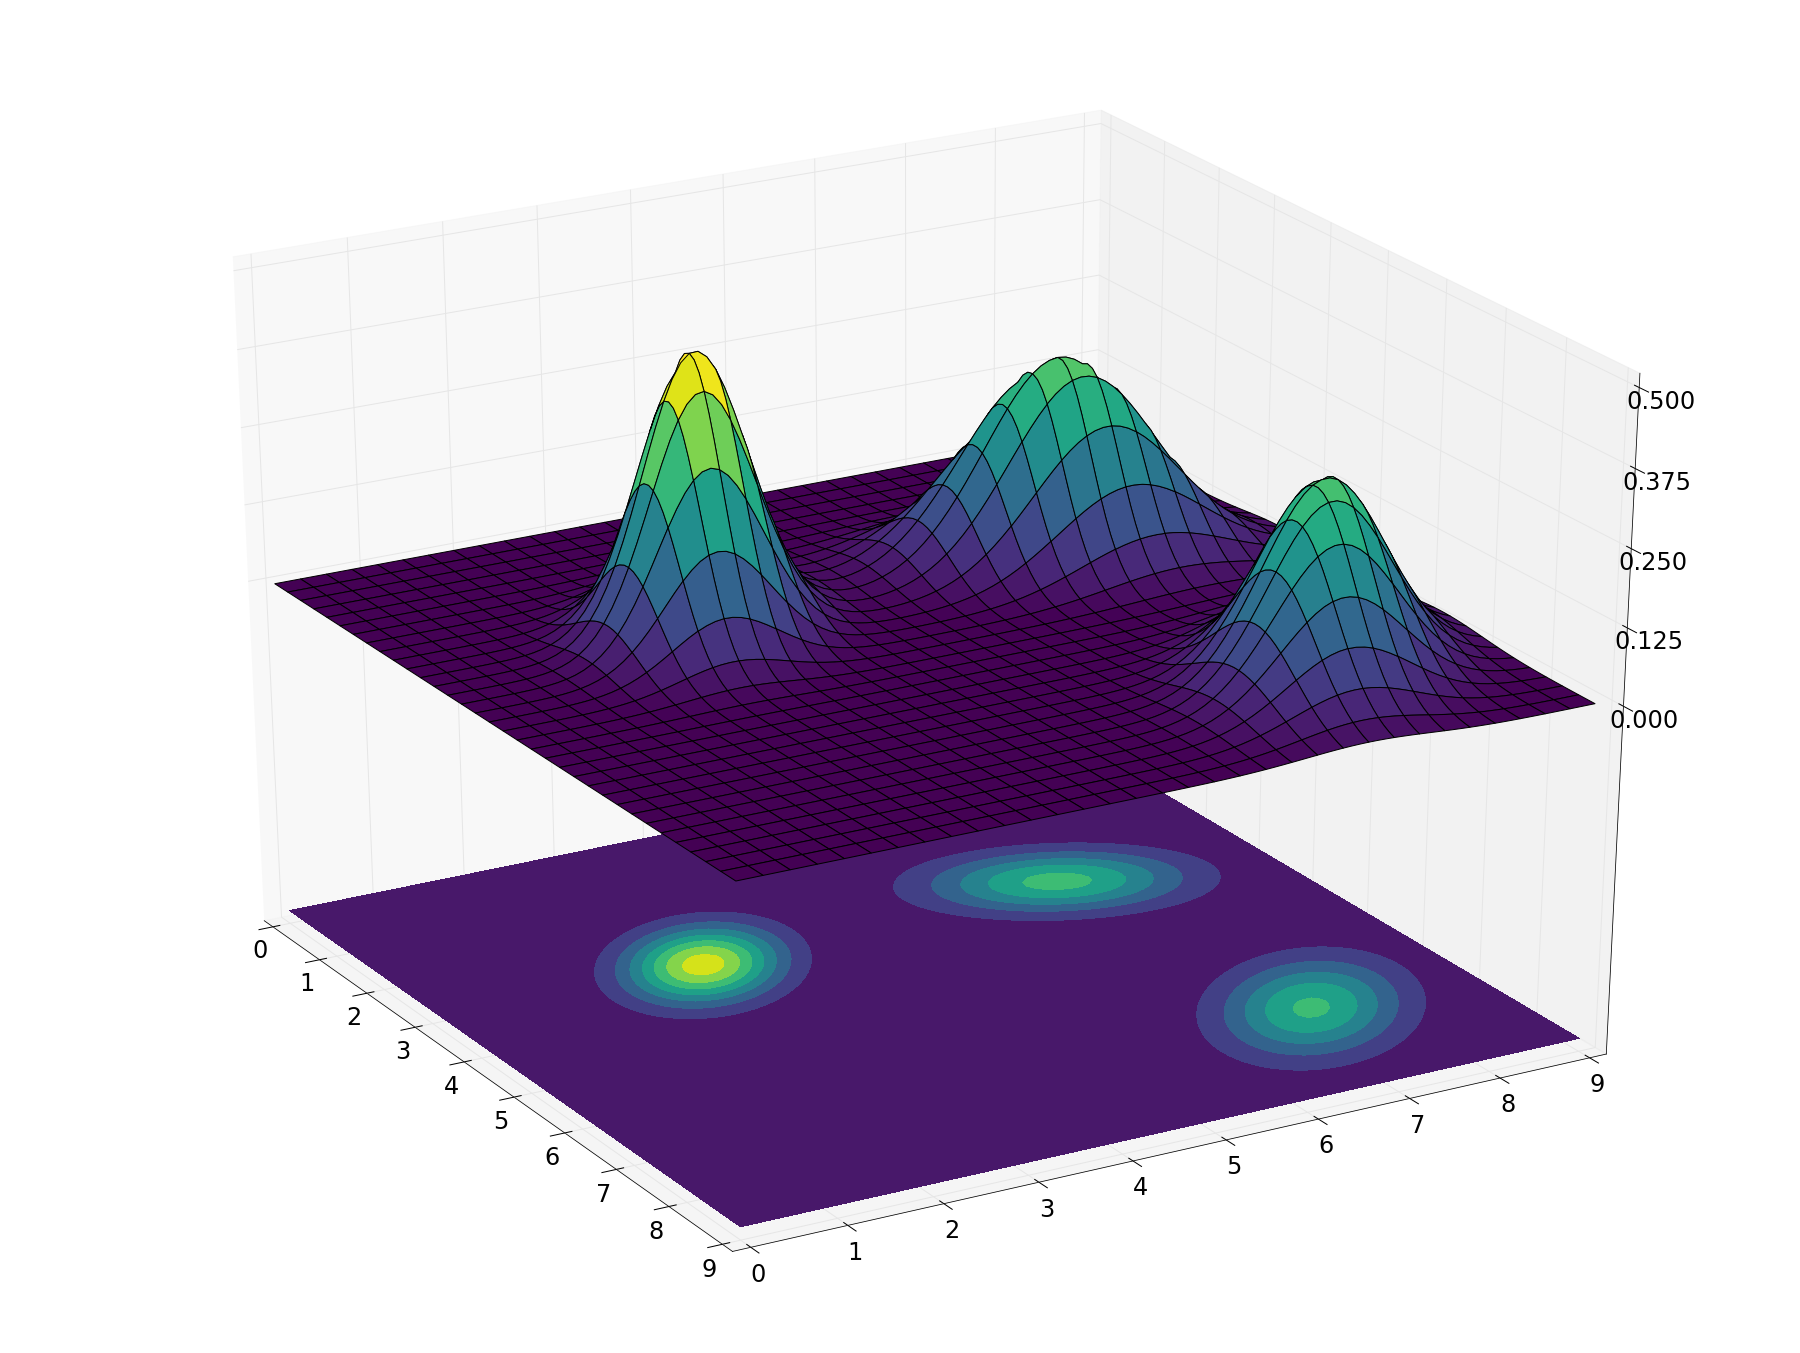

In [11]:
# calling the training dataset
X = np.matrix([traindata[:, 2], traindata[:, 4]]).T

# 0th element is the mean of training data samples in class 0
trainMeans = [np.array(np.mean(labelledTrainData[i], axis=0)) for i in range(0, len(labelledTrainData))]

# 0th element is the covariancematrix of  training data samples in class 0
trainCovariances= [np.array(np.cov(labelledTrainData[i].T)) for i in range(0, len(labelledTrainData))]

# calculate multivariate Gaussian pdf at pos
def multivariate_gaussian(pos, mu, Sigma):
    #pos - data sample
    #mu- mean vector
    #Sigma - covariance matrix
    
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

#plots a surface with probability density proportional to the 3 classes in the training dataset
def plotPDF(n, means, covariances):
    # n - determines the smoothness of the plot, directly correlated to accuracy
    # means - list of np.array  means
    # covariances - list of np.matrix covariances
    
    fig9 = plt.figure(0)
    ax9 = fig9.gca(projection='3d')
    xrange, yrange = np.linspace(0, 9, n), np.linspace(0, 9, n)  #modularize more to exclude 0 and 9
    X, Y = np.meshgrid(xrange, yrange)
    S = np.zeros((n, n))
    for k in range(0, clusterAmt):
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X
        pos[:, :, 1] = Y
        #ay = (np.matrix(trainCovariances[k])) #been too long i forgot why i put this here
        Z = multivariate_gaussian(pos, np.array(means[k][0]), np.matrix(covariances[k]))
        S +=Z
    ax9.plot_surface(X, Y, S, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
    cset = ax9.contourf(X, Y, S, zdir='z', offset=-0.55, cmap=cm.viridis)
    
    #making plot aesthetic
    ax9.set_zlim(-0.55,0.5)
    ax9.set_zticks(np.linspace(0,0.5,5))
    ax9.view_init(27, -30)
    plt.show()

plotPDF(100, trainMeans, trainCovariances)

[0.016180855711235807, 0.022675490505703152, 0.0156524584007384]


/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


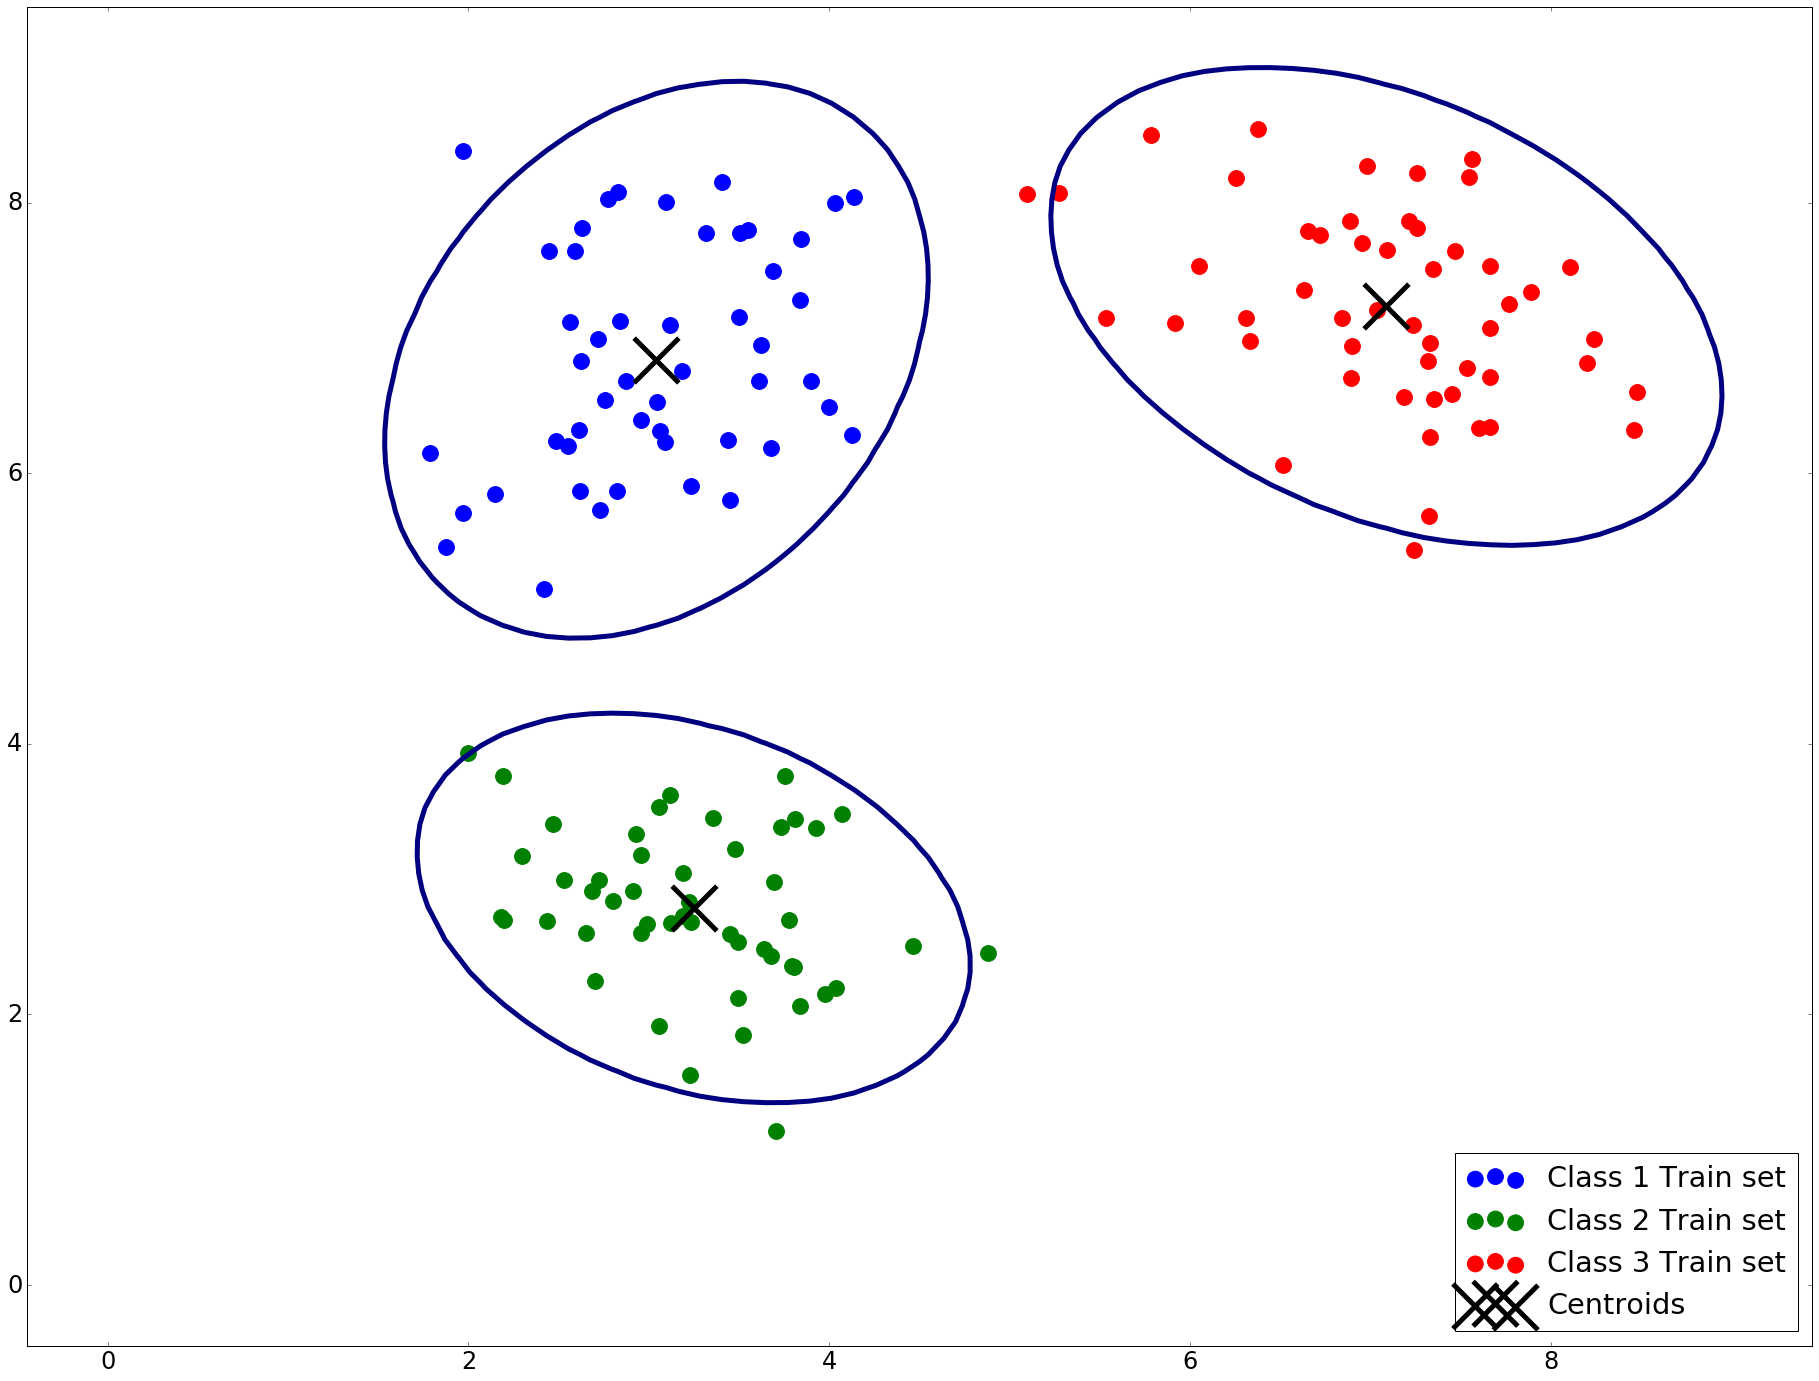

In [12]:
#since inside the function, X refers to cordinate axes
feature1 = traindata[:, 2]
feature2 = traindata[:, 4]
DATA = np.matrix([feature1, feature2]).T

# 0th element is the mean of samples in class 0
trainMeans = [np.array(np.mean(labelledTrainData[i], axis=0)) for i in range(0, len(labelledTrainData))]

# 0th element is the covariancematrix of samples in class 0
trainCovariances= [np.array(np.cov(labelledTrainData[i].T)) for i in range(0, len(labelledTrainData))]

#generates list of level surface values where the the contours at that level are the 95% confidence interval ellipses
def getThreshold(covariances, mdist):
    #covariances - list of covariance matrix
    #mdist- Mahalabonis distance 
    
    n = np.arange(0, len(covariances), 1)
    thresholds = list(map(lambda i: (np.linalg.det(2*np.pi* covariances[i])**(-1/2)) * np.exp(-mdist/2), n))
    return thresholds

lol = getThreshold(trainCovariances, 5.9915)
print(lol)

# plot confidence ellipse of 95% confidence
def plotContours(n, means, covariances, centers):
    # n - determines the smoothness of the plot, directly correlated to accuracy
    # means - list of np.array  means
    # covariances - list of np.matrix covariances
    # centers - list of np.array, i'th element is centroid of i'th class
    
    #get contour levels for each class
    contourLevels = getThreshold(covariances, 5.9915)
    
    fig4 = plt.figure(0)
    ax4 = fig4.add_subplot(111)
    xrange, yrange = np.linspace(0, 9, n), np.linspace(0, 9, n)  #modularize more to exclude 0 and 9
    X, Y = np.meshgrid(xrange, yrange)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    for k in range(0, clusterAmt):
        Z = multivariate_gaussian(pos, np.array(means[k][0]), np.matrix(covariances[k]))
        ax4.scatter([DATA[np.where(labels == k)][:,0]], [DATA[np.where(labels == k)][:,1]], s=250, color=colors[k % len(colors)], label="Class " + str(k+1) + " Train set")
        ax4.contour(X, Y, Z, levels = [contourLevels[k]], linewidths=5) 
    
    ax4.scatter([centers[:,0]], [centers[:,1]], marker='x', s=2000, color='k', label="Centroids", linewidths=5)
    plt.legend(loc=4)
    plt.show()

plotContours(75, trainMeans, trainCovariances, centers)


### Your comments ###

Put here any comments

### 2. ###
Now plot the decision boundaries between each pair of classes. This can be done once again using the `plt.contour` function, this time on each of the three pairwise likelihood ratios. Visually inspect the decision boundaries and make sure you understand why they have a particular shape. Also check whether this maximum-likelihood classifier disagrees with the nearest-centroid classifier on any of the test or training points (for both your data sets if you're working in pairs).

[array([[3.04226093, 6.84052845]]), array([[3.24768981, 2.78533789]]), array([[7.0871136 , 7.23373396]])]
[array([[0.37628065, 0.15367312],
       [0.15367312, 0.70552189]]), array([[ 0.3908059 , -0.10714616],
       [-0.10714616,  0.34450643]]), array([[ 0.57640229, -0.20377079],
       [-0.20377079,  0.52044615]])]


/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


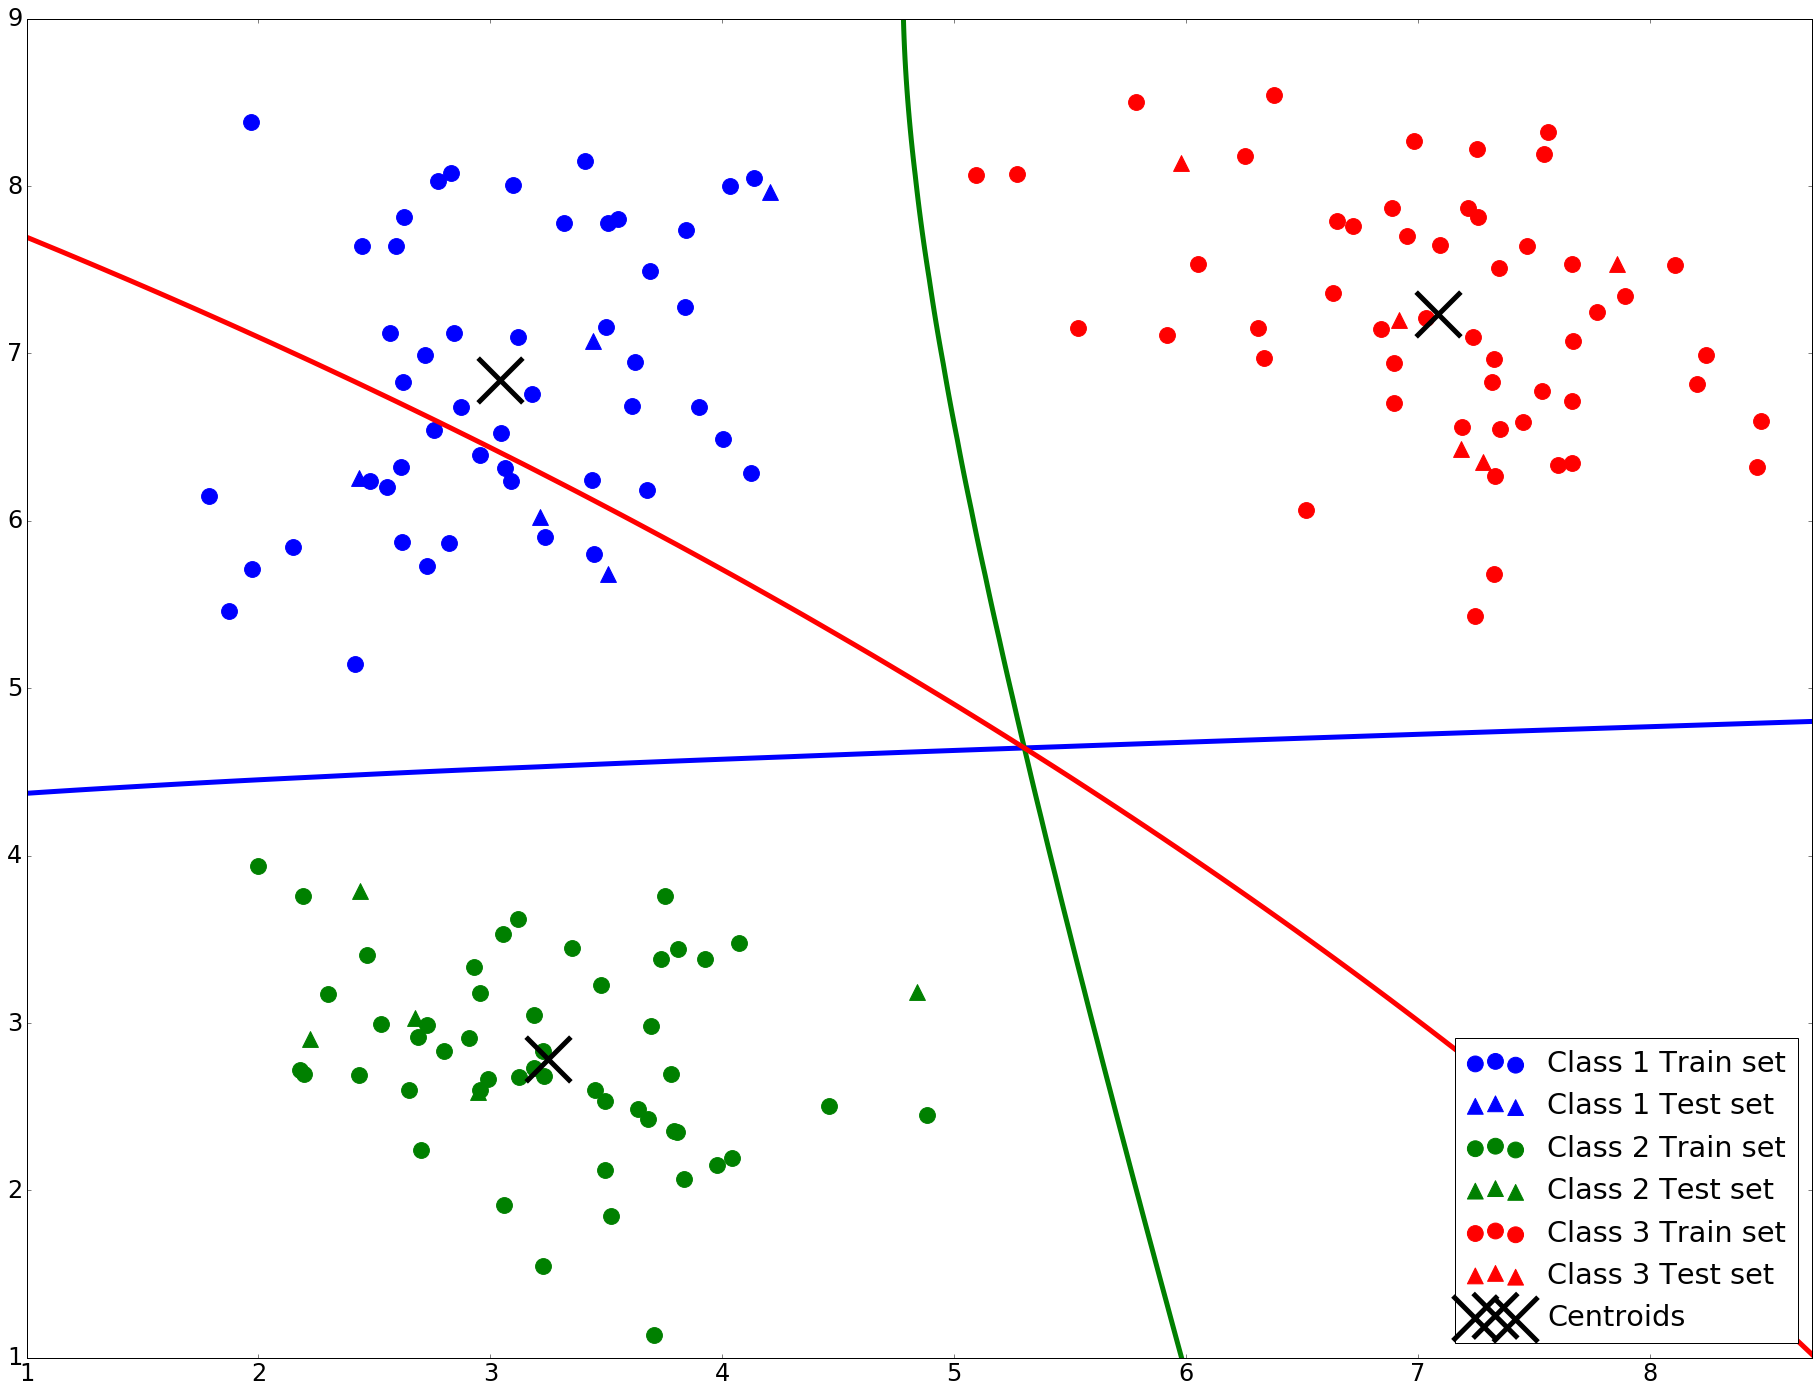

In [13]:
# 0th element is the mean of samples in class 0
trainMeans = [np.array(np.mean(labelledTrainData[i], axis=0)) for i in range(0, len(labelledTrainData))]

# 0th element is the covariancematrix of samples in class 0
trainCovariances= [np.array(np.cov(labelledTrainData[i].T)) for i in range(0, len(labelledTrainData))]

print(trainMeans)
print(trainCovariances)

def plotDecisionBoundaries(n, means, covariances, centers):
    # n - determines the smoothness of the plot, directly correlated to accuracy
    # means - list of np.array  means
    # covariances - list of np.matrix covariances
    # centers - list of np.array, i'th element is centroid of i'th class
    
    count = -1  #for coloring decision boundaries
    
    fig5 = plt.figure(0)
    ax5 = fig5.add_subplot(111)
    xrange, yrange = np.linspace(0, 9, n), np.linspace(0, 9, n)  #modularize more to exclude 0 and 9
    X, Y = np.meshgrid(xrange, yrange)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    likelihoodsM = [[] for i in range(clusterAmt)] #i'th element has P(x | w_i) for the domain x
    
    for k in range(0, clusterAmt):
        Z = np.log(multivariate_gaussian(pos, np.array(means[k][0]), np.matrix(covariances[k])))
        likelihoodsM[k] = Z
        ax5.scatter([DATA[np.where(labels == k)][:,0]], [DATA[np.where(labels == k)][:,1]], s=250, color=colors[k % len(colors)], label="Class " + str(k+1) + " Train set")
        ax5.scatter([Xtest[np.where(labelsTest == k)][:,0]], [Xtest[np.where(labelsTest == k)][:,1]], marker="^", s=250, color = colors[k % len(colors)], label = "Class " + str(k+1) + " Test set") #samples from test data

        
    #plotting decision boundaries
    for pair in itertools.combinations(likelihoodsM, r=2): 
        count+= 1
        plot = pair[0]/pair[1]
        ax5.contour(X, Y, plot, levels=[1], colors=colors[count % len(colors)], linewidths=5)
    
    ax5.scatter([centers[:,0]], [centers[:,1]], marker='x', s=2000, color='k', label="Centroids", linewidths=5)
    
    plt.gca().set_xlim([1,8.7])
    plt.gca().set_ylim([1,9])
    plt.legend(loc=4)
    plt.show()


plotDecisionBoundaries(150, trainMeans, trainCovariances, centers)


### Your comments ###

Put here any comments

### 3. ###
How would you have to change the maximum-likelihood classifier so that its decision boundaries are the same as the ones for nearest-centroid? And how would you change it if you know that one of the three classes is twice as likely as the other two? Demonstrate the effect graphically.

/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


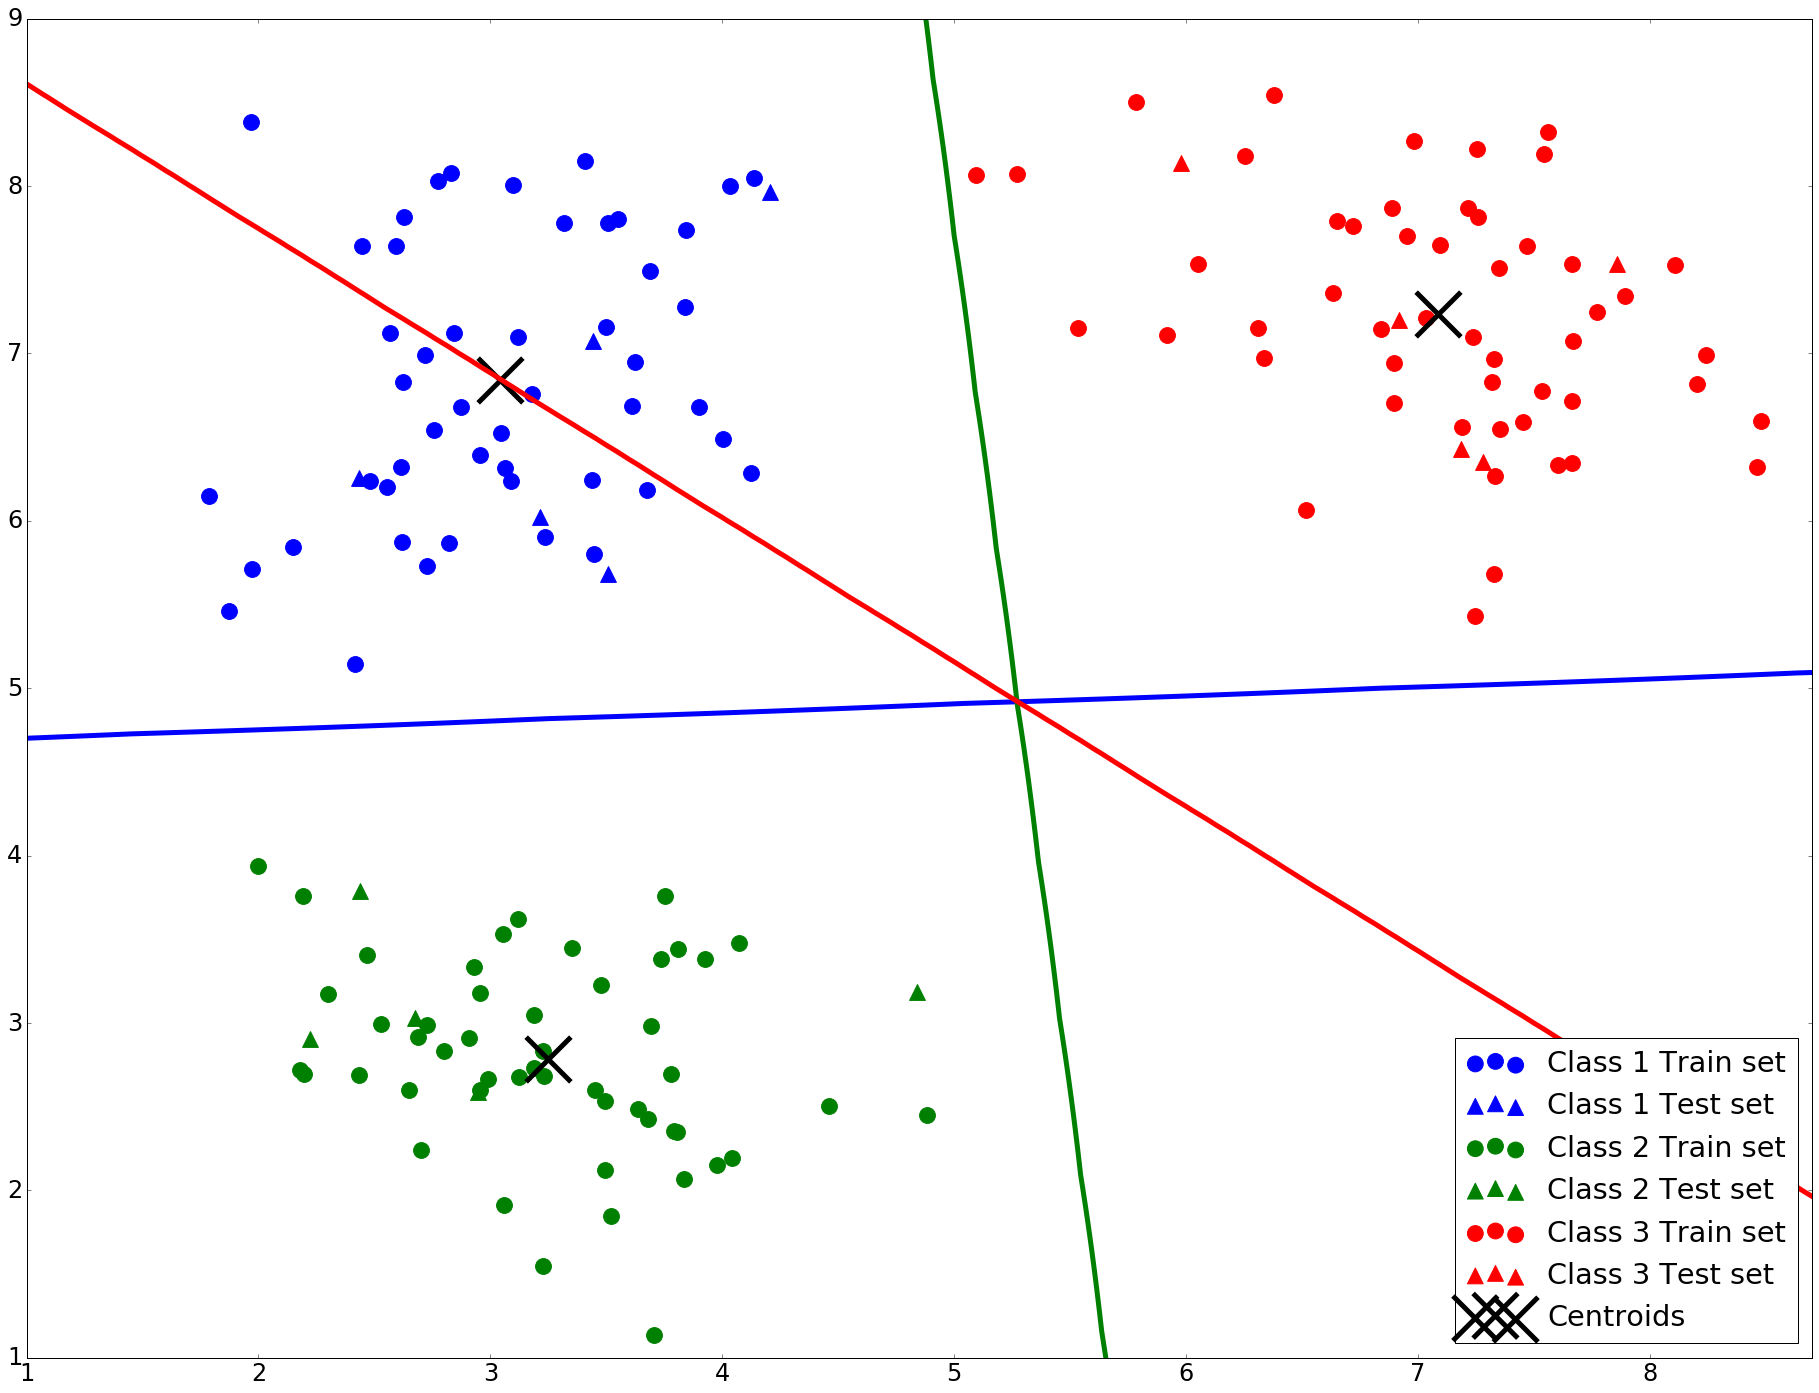

In [14]:
#classifier with decision boundaries similar to nearest centroid
def plotDecisionBoundariesFlatten(n, means, covariances, centers):
    # n - determines the smoothness of the plot, directly correlated to accuracy
    # means - list of np.array  means
    # covariances - list of np.matrix covariances
    # centers - list of np.array, i'th element is centroid of i'th class
    
    count = -1  #for coloring decision boundaries
    
    fig5 = plt.figure(0)
    ax5 = fig5.add_subplot(111)
    xrange, yrange = np.linspace(0, 9, n), np.linspace(0, 9, n)  #modularize more to exclude 0 and 9
    X, Y = np.meshgrid(xrange, yrange)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    likelihoodsM = [[] for i in range(clusterAmt)]
    
    for k in range(0, clusterAmt):
        independence = np.diag(np.diag(trainCovariances[k])) #making the xy correlation 0, just for fun testing
        identity = np.identity(2) #any positive multiple of this makes decision boundaries linear
        Z = multivariate_gaussian(pos, np.array(means[k][0]), np.matrix(identity))
        likelihoodsM[k] = Z
        ax5.scatter([DATA[np.where(labels == k)][:,0]], [DATA[np.where(labels == k)][:,1]], s=250, color=colors[k % len(colors)], label="Class " + str(k+1) + " Train set")
        ax5.scatter([Xtest[np.where(labelsTest == k)][:,0]], [Xtest[np.where(labelsTest == k)][:,1]], marker="^", s=250, color = colors[k % len(colors)], label = "Class " + str(k+1) + " Test set") #samples from test data
    
    for pair in itertools.combinations(likelihoodsM, r=2): #plotting pairwise decision boundaries
        count+= 1
        plot = pair[0]/pair[1]
        ax5.contour(X, Y, plot, levels=[1], colors=colors[count % len(colors)], linewidths=5)
    
    ax5.scatter([centers[:,0]], [centers[:,1]], marker='x', s=2000, color='k', label="Centroids", linewidths=5)
    
    plt.gca().set_xlim([1,8.7])
    plt.gca().set_ylim([1,9])
    plt.legend(loc=4)
    plt.show()

plotDecisionBoundariesFlatten(100, trainMeans, trainCovariances, centers)

/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/mnazaal/.local/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


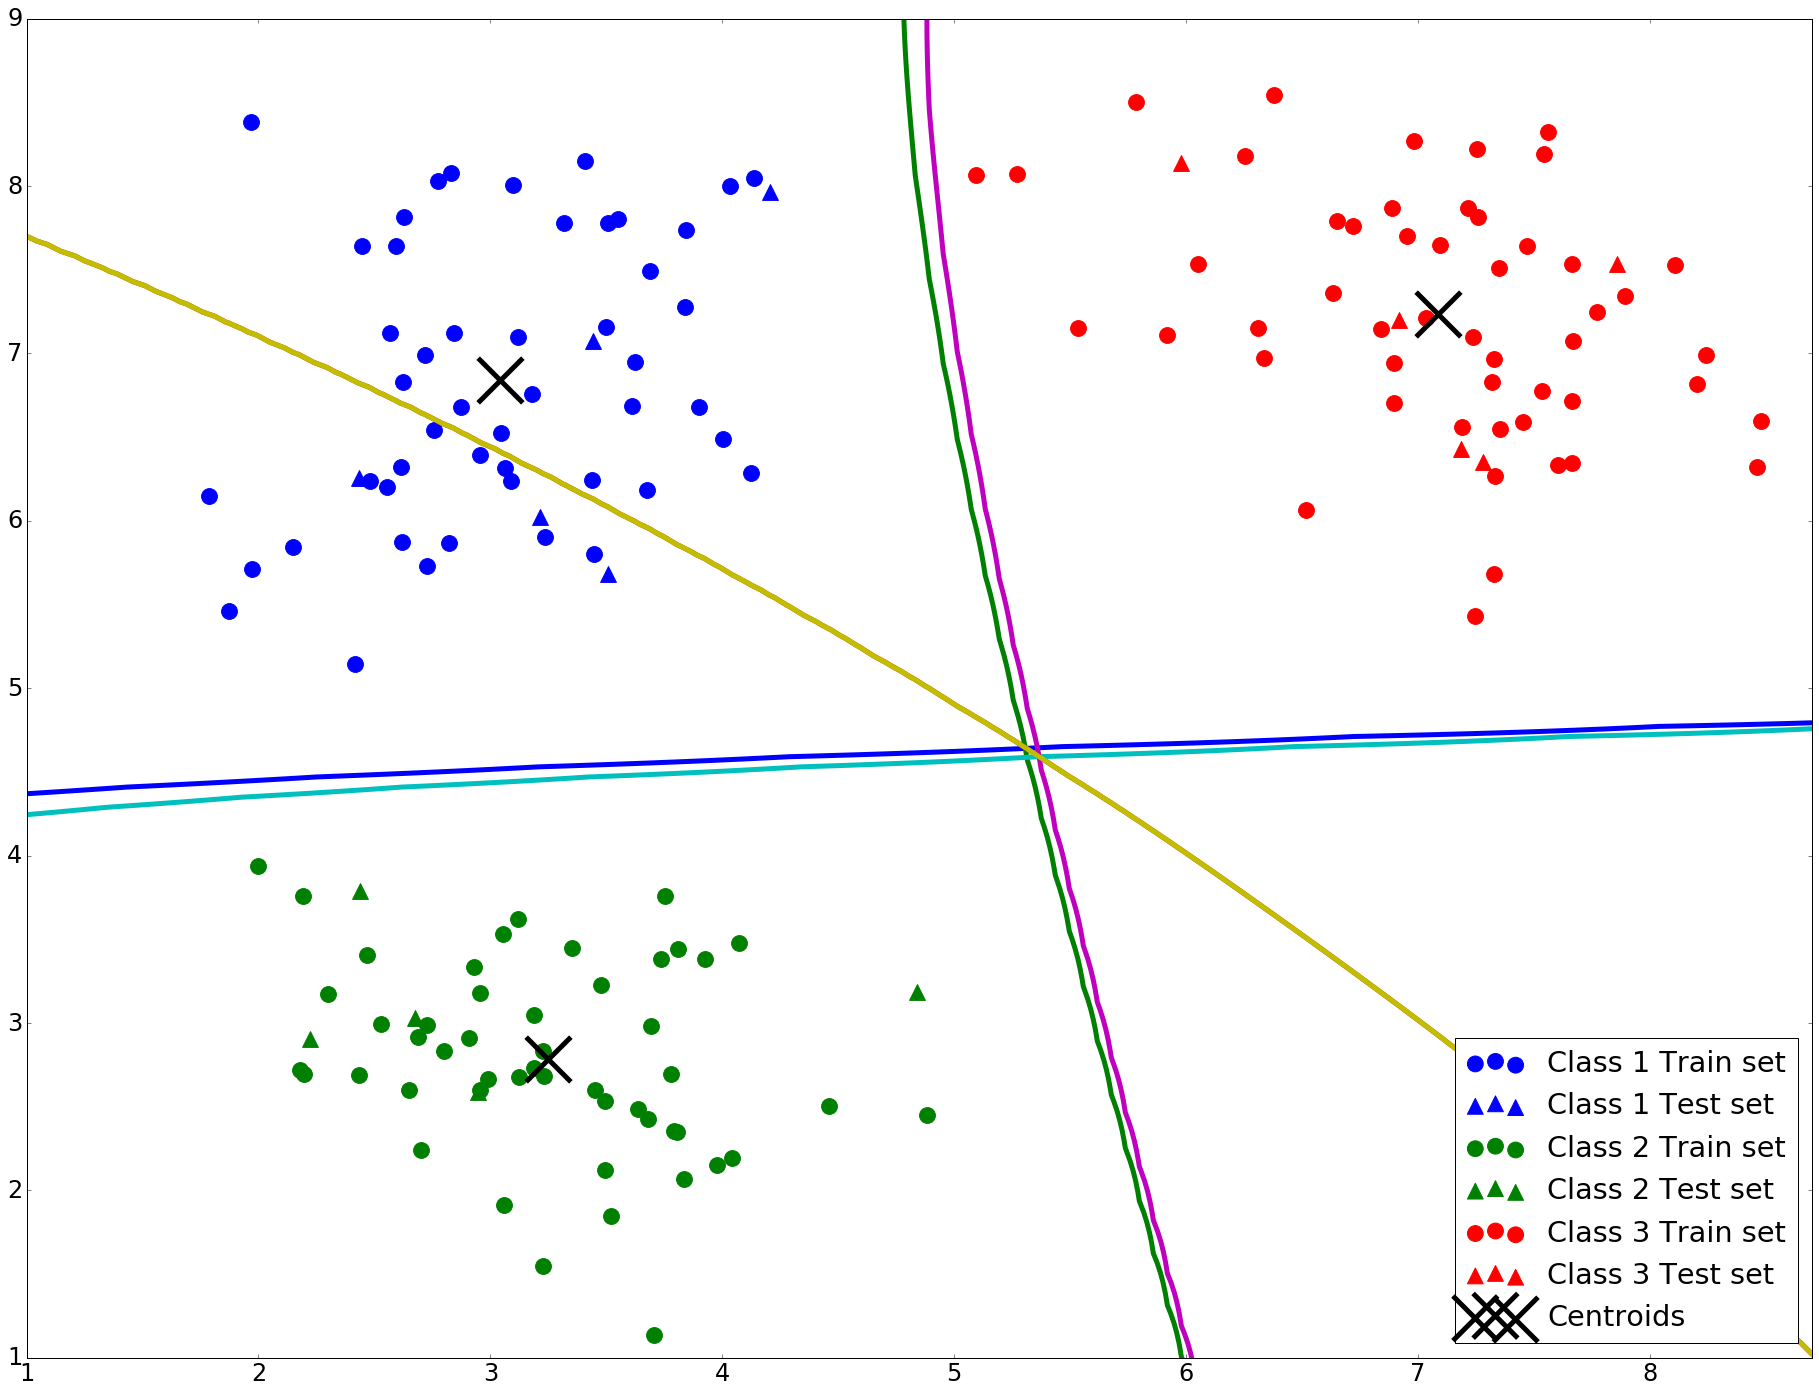

In [15]:
# plotting with a priori probability distribution
def plotDecisionBoundaries_aPriori(n, means, covariances, centers, priori):
    # n - determines the smoothness of the plot, directly correlated to accuracy
    # means - list of np.array  means
    # covariances - list of np.matrix covariances
    # centers - list of np.array, i'th element is centroid of i'th class
    # priori - list of probability mass, ith element is the prior probability of class i occurring
    
    count = -1  #for coloring decision boundaries
    
    fig5 = plt.figure(0)
    ax5 = fig5.add_subplot(111)
    xrange, yrange = np.linspace(0, 9, n), np.linspace(0, 9, n)  #modularize more to exclude 0 and 9
    X, Y = np.meshgrid(xrange, yrange)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    likelihoodsM = [[] for i in range(clusterAmt)]
    likelihoodsMpriori = [[] for i in range(clusterAmt)]
    
    for k in range(0, clusterAmt):
        #Z = multivariate_gaussian(pos, np.array(means[k][0]), trainCovariances[k])
        likelihoodsM[k] = multivariate_gaussian(pos, np.array(means[k][0]), trainCovariances[k])
        
        #Zpriori = *priori[k]
        likelihoodsMpriori[k] = likelihoodsM[k]*priori[k]
        ax5.scatter([DATA[np.where(labels == k)][:,0]], [DATA[np.where(labels == k)][:,1]], s=250, color=colors[k % len(colors)], label="Class " + str(k+1) + " Train set")
        ax5.scatter([Xtest[np.where(labelsTest == k)][:,0]], [Xtest[np.where(labelsTest == k)][:,1]], marker="^", s=250, color = colors[k % len(colors)], label = "Class " + str(k+1) + " Test set") #samples from test data
    
    for pair in itertools.combinations(likelihoodsM, r=2): #plotting pairwise decision boundaries
        count+= 1
        plot = pair[0]/pair[1]
        ax5.contour(X, Y, plot, levels=[1], colors=colors[count % len(colors)], linewidths=5)
        
    for pair in itertools.combinations(likelihoodsMpriori, r=2): #plotting pairwise decision boundaries
        count+= 1
        plot = pair[0]/pair[1]
        ax5.contour(X, Y, plot, levels=[1], colors=colors[count % len(colors)], linewidths=5)
    
    ax5.scatter([centers[:,0]], [centers[:,1]], marker='x', s=2000, color='k', label="Centroids", linewidths=5)
    
    #making plot aesthetic
    plt.gca().set_xlim([1,8.7])
    plt.gca().set_ylim([1,9])
    plt.legend(loc=4)
    plt.show()
    
plotDecisionBoundaries_aPriori(150, trainMeans, trainCovariances, centers, [0.5, 0.25, 0.25])

### Your comments ###

Put here any comments



## CW1c (week 19) ##
You now need to write a report which describes, explains and analyses the work you have done for **CW1a** and **CW1b**. The aim of this report is to demonstrate your understanding of methods you used and the results that you have obtained. This will be useful training for the CW2 assignment which is entirely assessed through a report.

As this is not a `Python` programming assignment you are not allowed to use any `Python` code in your report. So, rather than "The program then calls `kmeans(data,3)` and stores the result in `some_var`" you should write something like "we then applied K-means clustering to this data set to obtain K=3 clusters".

The report should be **no more than 4 pages long using no less than 11 point font** and should be submitted in `pdf` format on SAFE. You will continue to work in pairs and at least one of you should upload the report. Make sure that the submitted report clearly identifies the authors.

We suggest you use the following headings in the report (but this is not prescriptive):
1. Introduction
2. Feature selection
3. Identifying the classes
4. Nearest-centroid classification
5. Maximum-likelihood classification
6. Discussion of results
7. Sources used

Notice how these sections don't map one-to-one to the questions above, but rather concentrate on telling a 'story'. In each section you should briefly explain what the question is, how you approached it and what the results are. We will expect you to include plots generated by `Python`, but these should not take more than about *one-third of the report*. Each plot should have a numbered caption with a succinct description. You need to include plots for both datasets assigned to you and your partner.

**To gain high marks your report will need to demonstrate a good understanding of the tasks and the methods used, backed up by a clear explanation of your experimental results.**